# Metadata overview

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

In [2]:
# load metadata

df_meta = pd.read_csv("datasets_output/df_pub.csv",compression="gzip")
df_cord = pd.read_csv("datasets_input/CORD19_01_07_2020/metadata.csv")

In [3]:
df_meta.head()

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,pmid,pmcid,dimensions_id,arxiv_id,timestamp
0,0,Coronavirus disease 2019 (COVID-19) and simult...,Coronavirus disease 2019 (COVID-19) is a recen...,2020.0,5.0,CardioVascular Journal of Africa,31,NaN,1-4,10-5830-cvja-2020-016,32490506.0,NaN,pub.1128171889,NaN,2020-07-02 10:54:27.347501
1,1,[Ten hot issues of breast cancer under the nov...,NaN,2020.0,2.0,Chinese medical journal,100,0,e002,10.0376/cma.j.issn.0376-2491.2020.0002,32036640.0,NaN,pub.1124777091,NaN,2020-07-02 10:54:27.347501
2,2,Cohesion in Distancing.,"In isolation, we are physically apart; in soli...",2020.0,4.0,The AMA Journal of Ethic,22,4,e344-345,10.1001/amajethics.2020.344,32345430.0,NaN,pub.1127182341,NaN,2020-07-02 10:54:27.347501
3,3,Salvation in a Time of Plague.,Health workers offer their skills and care to ...,2020.0,5.0,The AMA Journal of Ethic,22,5,e441-445,10.1001/amajethics.2020.441,32449663.0,NaN,pub.1127905371,NaN,2020-07-02 10:54:27.347501
4,4,What Should Health Science Journalists Do in E...,Journalists have long covered outbreaks of inf...,2020.0,1.0,AMA journal of ethics,NaN,NaN,NaN,10.1001/amajethics.2020.55,31958392.0,NaN,NaN,NaN,2020-07-02 10:54:27.347501


In [4]:
df_meta.columns

Index(['pub_id', 'title', 'abstract', 'publication_year', 'publication_month',
       'journal', 'volume', 'issue', 'pages', 'doi', 'pmid', 'pmcid',
       'dimensions_id', 'arxiv_id', 'timestamp'],
      dtype='object')

In [5]:
df_meta[pd.notnull(df_meta.abstract)].shape

(121278, 15)

#### Publication years

In [6]:
import re

def clean_year(s):
    if pd.isna(s):
        return np.nan
    if not (s>1900):
        return np.nan
    elif s>2020:
        return 2020
    return s

df_meta["publication_year"] = df_meta["publication_year"].apply(clean_year)

In [7]:
df_meta.publication_year.describe()

count    160644.000000
mean       2015.180822
std           7.054152
min        1901.000000
25%        2012.000000
50%        2018.000000
75%        2020.000000
max        2020.000000
Name: publication_year, dtype: float64

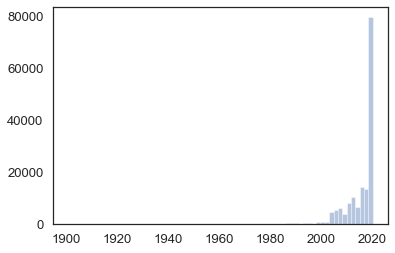

In [8]:
sns.distplot(df_meta.publication_year.tolist(), bins=70, kde=False)

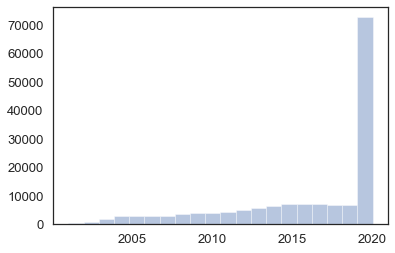

In [9]:
sns.distplot(df_meta[(pd.notnull(df_meta.publication_year)) & (df_meta.publication_year > 2000)].publication_year.tolist(), bins=20, hist=True, kde=False)

In [10]:
df_meta["abstract_length"] = df_meta.abstract.str.len()

In [11]:
df_meta[df_meta.abstract_length>0].shape

(121278, 16)

#### Null values

In [12]:
df_meta.shape

(160656, 16)

In [13]:
sum(pd.notnull(df_meta.abstract))

121278

In [17]:
sum(pd.notnull(df_meta.doi))

147256

In [18]:
sum(pd.notnull(df_meta.pmcid))

79234

In [19]:
sum(pd.notnull(df_meta.pmid))

112913

In [20]:
sum(pd.notnull(df_meta.journal))

156325

#### Journals

In [21]:
df_meta.journal.value_counts()[:30]

medRxiv                                                                            4387
SSRN Electronic Journal                                                            2925
Research Square                                                                    1782
bioRxiv                                                                            1717
PLoS One                                                                           1669
Journal of virology                                                                1607
arXiv                                                                              1345
Virology                                                                            935
Surgical endoscopy                                                                  918
Nature                                                                              792
Emerg Infect Dis                                                                    772
Science                         

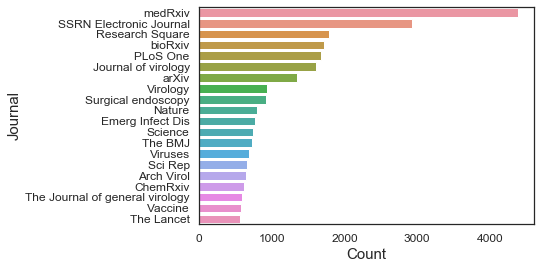

In [22]:
df_sub = df_meta[df_meta.journal.isin(df_meta.journal.value_counts()[:20].index.tolist())]
b = sns.countplot(y="journal", data=df_sub, order=df_sub['journal'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Journal",fontsize=15)
b.tick_params(labelsize=12)

#### Sources and licenses

For CORD19

In [23]:
df_cord.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,1.14726e+07,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,1.1668e+07,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,1.1668e+07,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,1.16869e+07,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,1.16869e+07,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


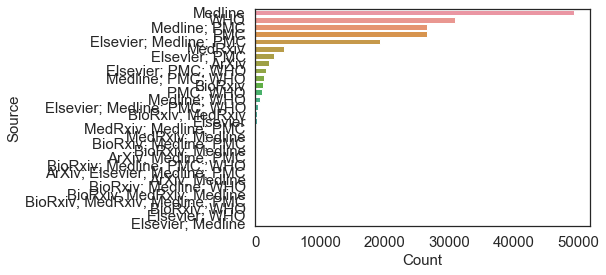

In [24]:
# source
df_sub = df_cord[df_cord.source_x.isin(df_cord.source_x.value_counts()[:30].index.tolist())]
b = sns.countplot(y="source_x", data=df_sub, order=df_sub['source_x'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Source",fontsize=15)
b.tick_params(labelsize=15)

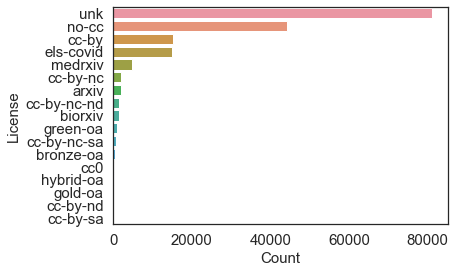

In [25]:
# license
df_sub = df_cord[df_cord.license.isin(df_cord.license.value_counts()[:30].index.tolist())]
b = sns.countplot(y="license", data=df_sub, order=df_sub['license'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("License",fontsize=15)
b.tick_params(labelsize=15)

#### Full text availability

In [26]:
df_cord["has_full_text"] = pd.notnull(df_cord.pmc_json_files)

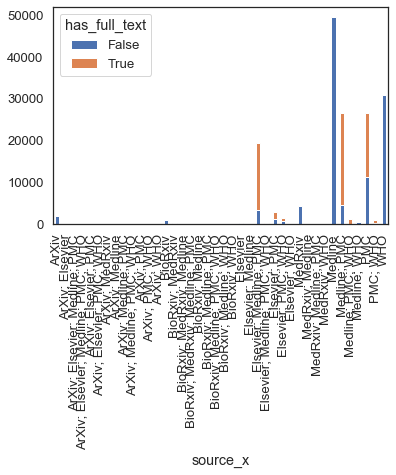

In [27]:
# full text x source
df_plot = df_cord.groupby(['has_full_text', 'source_x']).size().reset_index().pivot(columns='has_full_text', index='source_x', values=0)
df_plot.plot(kind='bar', stacked=True)

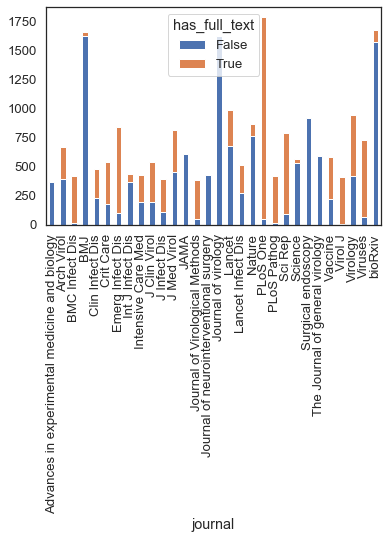

In [28]:
# full text x journal
df_sub = df_cord[df_cord.journal.isin(df_cord.journal.value_counts()[:30].index.tolist())]
df_plot = df_sub.groupby(['has_full_text', 'journal']).size().reset_index().pivot(columns='has_full_text', index='journal', values=0)
df_plot.plot(kind='bar', stacked=True)

### Overlap of CORD19 with Dimensions and WHO

This is still problematically low..

In [31]:
# datasets

dimensions_latest = "datasets_input/Dimensions_01_07_2020.csv"

df_dimensions = pd.read_csv(dimensions_latest, sep=";")

In [32]:
dimensions_dois = df_dimensions[pd.notnull(df_dimensions["DOI"])]["DOI"].tolist()

In [33]:
cord_dois = df_cord[pd.notnull(df_cord["doi"])]["doi"].tolist()

In [34]:
len(cord_dois)

127553

In [35]:
len(set(cord_dois).intersection(set(dimensions_dois)))/len(set(dimensions_dois))

0.6603490936021948

## Abstracts

In [14]:
abstracts = df_meta[pd.notnull(df_meta["abstract"])].abstract.tolist()
abstracts[1]

'In isolation, we are physically apart; in solidarity, we are together. The COVID-19 pandemic emphasizes our social responsibility to maintain physical distance from one another. In doing so, we solidify our collective strength.'

#### Topic modelling

In [15]:
from tqdm import tqdm
import gensim, sklearn, spacy
import pyLDAvis.gensim

In [31]:
!python -m spacy download en


    Linking successful
    /anaconda3/envs/covid/lib/python3.7/site-packages/en_core_web_sm -->
    /anaconda3/envs/covid/lib/python3.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [16]:
nlp = spacy.load('en')
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

In [18]:
%%time

processed_docs = list()
for doc in nlp.pipe(abstracts, n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    #ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than one word.
    #doc.extend([str(entity) for entity in ents if len(entity) > 1])
                        
    processed_docs.append(doc)

KeyboardInterrupt: 

In [81]:
import pickle

pickle.dump(processed_docs, open("datasets_output/processed_docs.pk", "wb"))

In [50]:
import pickle

processed_docs = pickle.load(open("datasets_output/processed_docs.pk", "rb"))

In [82]:
docs = processed_docs
del processed_docs

# Add bigrams
from gensim.models.phrases import Phrases
# Add bigrams to docs (only ones that appear several times or more). A better approach would be to use a chi_sq test.
bigram = Phrases(docs, min_count=50)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [83]:
# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 10

In [84]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of docs: %d (%d)' % (len(corpus),len(abstracts)))

Number of unique tokens: 14389
Number of docs: 39154 (39154)


In [85]:
%%time

from gensim.models import LdaMulticore, LdaModel
params = {'num_topics': 15,'passes': 3, 'random_state': seed}
model = LdaModel(corpus=corpus, num_topics=params['num_topics'], id2word=dictionary, #workers=6,
                passes=params['passes'], random_state=params['random_state'])

CPU times: user 1min 24s, sys: 796 ms, total: 1min 24s
Wall time: 1min 23s


In [86]:
model.show_topics(num_words=5, num_topics=params['num_topics'])

[(0,
  '0.049*"respiratory" + 0.047*"virus" + 0.041*"infection" + 0.023*"viral" + 0.023*"child"'),
 (1,
  '0.048*"rna" + 0.028*"sequence" + 0.024*"virus" + 0.024*"gene" + 0.015*"genome"'),
 (2,
  '0.079*"influenza" + 0.023*"influenza_virus" + 0.022*"case" + 0.018*"pandemic" + 0.012*"virus"'),
 (3,
  '0.025*"group" + 0.023*"diarrhea" + 0.022*"pig" + 0.021*"day" + 0.019*"strain"'),
 (4,
  '0.016*"rat" + 0.013*"increase" + 0.012*"group" + 0.011*"study" + 0.011*"effect"'),
 (5,
  '0.038*"protein" + 0.024*"virus" + 0.021*"cell" + 0.015*"activity" + 0.014*"viral"'),
 (6,
  '0.056*"cell" + 0.025*"infection" + 0.022*"mouse" + 0.019*"virus" + 0.018*"response"'),
 (7,
  '0.026*"calf" + 0.025*"assay" + 0.024*"sample" + 0.021*"test" + 0.021*"pcr"'),
 (8,
  '0.030*"sars" + 0.030*"cov" + 0.029*"antibody" + 0.027*"coronavirus" + 0.024*"protein"'),
 (9,
  '0.034*"virus" + 0.022*"disease" + 0.022*"human" + 0.017*"animal" + 0.013*"specie"'),
 (10,
  '0.020*"disease" + 0.015*"review" + 0.014*"vaccine" + 

In [87]:
# plot topics (NOTE: the IDs here do not match those from the model)
data =  pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.display(data)

In [110]:
# topics over time
# the topics of ALL the documents of our corpus

df_local = df_meta[pd.notnull(df_meta["abstract"])]
publication_years = df_local.publication_year.tolist()
dois = df_local.doi.tolist()
topics = np.zeros((len(docs),params['num_topics']))

for n,doc_topics in enumerate(model.get_document_topics(corpus)):
    for t in doc_topics:
        topics[n][t[0]] = t[1]

In [111]:
topics[0,:]

array([0.03333401, 0.03333402, 0.03333398, 0.03333421, 0.03333408,
       0.03333404, 0.03333399, 0.03333408, 0.03333404, 0.03333401,
       0.53332347, 0.03333399, 0.03333404, 0.03333413, 0.03333398])

In [112]:
model.get_document_topics(corpus[0])

[(0, 0.033333972),
 (1, 0.033333976),
 (2, 0.033333942),
 (3, 0.033334054),
 (4, 0.03333404),
 (5, 0.033333994),
 (6, 0.03333395),
 (7, 0.033334035),
 (8, 0.033333994),
 (9, 0.033333965),
 (10, 0.033334073),
 (11, 0.033333957),
 (12, 0.033334),
 (13, 0.53332406),
 (14, 0.03333394)]

In [113]:
df_topics = pd.DataFrame(topics)

In [114]:
df_topics["year"] = publication_years
df_topics["doi"] = dois

In [115]:
from_which_year = 2000

grouped = df_topics.groupby('year')
df_grouped = grouped.aggregate(np.mean)
df_grouped = df_grouped[df_grouped.index >= from_which_year]
#df_grouped

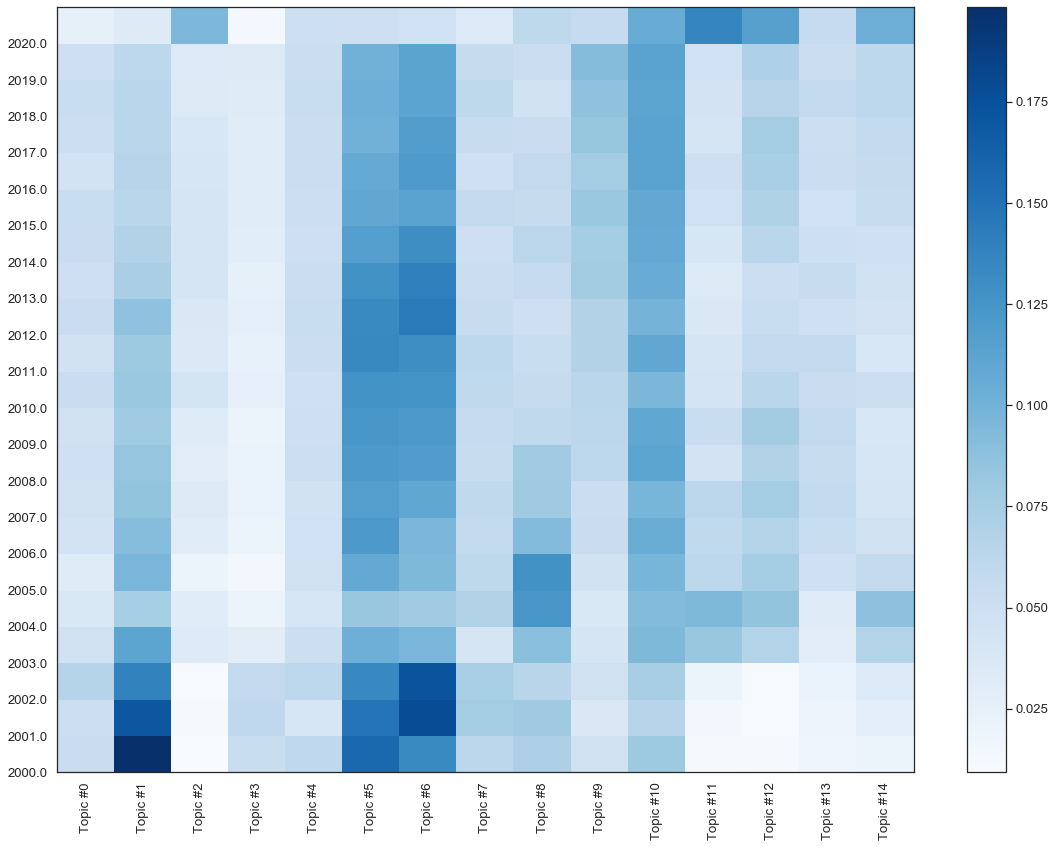

In [116]:
fig = plt.figure(figsize=(16, 12))
plt.pcolor(df_grouped.to_numpy(), norm=None, cmap='Blues')
plt.yticks(np.arange(df_grouped.to_numpy().shape[0]), df_grouped.index.values)
plt.xticks(np.arange(df_grouped.to_numpy().shape[1])+0.5, ["Topic #"+str(n) for n in range(model.num_topics)], rotation = 90)
plt.colorbar(cmap='Blues')  # plot colorbar
plt.tight_layout()  # fixes margins
plt.show()

#### Language modelling

In [118]:
from gensim.models import Word2Vec
import pickle

processed_docs = pickle.load(open("datasets_output/processed_docs.pk", "rb"))

model = Word2Vec(processed_docs, size=256, window=10, min_count=2, workers=6)

In [119]:
model.wv.most_similar("coronavirus")

[('covs', 0.6251739263534546),
 ('cov', 0.5501048564910889),
 ('betacoronavirus', 0.5166511535644531),
 ('hcov', 0.48612651228904724),
 ('hcovs', 0.4802132546901703),
 ('coronaviruses', 0.48010629415512085),
 ('astrovirus', 0.4582931399345398),
 ('virus', 0.4369690418243408),
 ('scovs', 0.4323999881744385),
 ('alphacoronavirus', 0.4261910915374756)]

#### Keyword extraction

Using [RAKE](https://csurfer.github.io/rake-nltk/_build/html/index.html)

In [126]:
from rake_nltk import Rake

# Uses stopwords for English from NLTK, and all puntuation characters by default
r = Rake(min_length=2)

# Extraction given the text
r.extract_keywords_from_text(abstracts[1])

In [127]:
# To get keyword phrases ranked highest to lowest.
r.get_ranked_phrases()[:10]

['serological andpathogenic microorganism test results',
 'provide reasonable suggestions',
 '100 countries around',
 'interstitial lung disease',
 'disease onset characteristics',
 'onset ild',
 'lung injury',
 'image characteristics',
 'spread rapidly',
 'repair caused']

In [128]:
# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()[:10]

[(25.0, 'serological andpathogenic microorganism test results'),
 (9.0, 'provide reasonable suggestions'),
 (9.0, '100 countries around'),
 (8.5, 'interstitial lung disease'),
 (8.0, 'disease onset characteristics'),
 (4.5, 'onset ild'),
 (4.5, 'lung injury'),
 (4.5, 'image characteristics'),
 (4.0, 'spread rapidly'),
 (4.0, 'repair caused')]

In [123]:
len(processed_docs)

39154

In [124]:
r = Rake(min_length=2, max_length=3)
# Extraction given the list of strings where each string is a sentence.
r.extract_keywords_from_sentences([" ".join(d) for d in processed_docs])

In [125]:
# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()[:50]

[(9.0, 'welcome adam vaughan'),
 (9.0, 'wash hand thoroughly'),
 (9.0, 'understand pandemic datum'),
 (9.0, 'trypsin cod trypsin'),
 (9.0, 'trichothecene mycotoxin deoxynivalenol'),
 (9.0, 'tolerance self rna'),
 (9.0, 'summarize presentation discussion'),
 (9.0, 'suffer cold addition'),
 (9.0, 'substitute mask alternative'),
 (9.0, 'strategy widely applicable'),
 (9.0, 'start codon suggest'),
 (9.0, 'speak italy day'),
 (9.0, 'set richard smyth'),
 (9.0, 'sensible way plan'),
 (9.0, 'scary hard stand'),
 (9.0, 'remain committed neurorehabilitation'),
 (9.0, 'rely quarantine isolation'),
 (9.0, 'pneumonia problem worldwide'),
 (9.0, 'new york dutton'),
 (9.0, 'need think containment'),
 (9.0, 'method general interest'),
 (9.0, 'measure cleavage angiotensin'),
 (9.0, 'knowledge sars high'),
 (9.0, 'join faculty worker'),
 (9.0, 'influence hbv transcription'),
 (9.0, 'individual different value'),
 (9.0, 'illustrate application pandemic'),
 (9.0, 'haq posthoc conclusion'),
 (9.0, 'febril